# Components of a time series

Visualizing the components of a time series is known as decomposition. `Time series decomposition` is a process by which we separate a time series into its components: `trend`, `seasonality`, and `residuals`.
* The `trend` represents the slow-moving changes in a time series. It is responsible for making the series gradually  increase or decrease over time. 
* The `seasonality` component represents the seasonal pattern in the series. The cycles occur repeatedly over a fixed period of time. 
* The `residuals` represent the behavior that cannot be explained by the trend and seasonality components. They correspond to random errors, also termed `white noise`. 

# Time series vs Regression
* Time series have an order in time
* Time series sometimes do not have features
* Shuffling the time series data is not allowed. 

## 1. The random walk process
A random walk is a process in which there is an equal chance of going up or down by a random number. A random walk is a series whose first difference is `stationary` and `uncorrelated`. This means that the process moves completely at random. 
* Random walks often expose long periods where a positive or negative trend can be observed.
* It is often accompanied by sudden changes in direction. 

In a random walk process, we say that the present value $y_t$ is a function of the value at the previous timestep $y_{t – 1}$, a constant $C$, and a random number $ϵ_t$, also termed as `white noise`. Here, ${ϵ_t}$ is the realization of a normal distribution with a mean of 0.

$y_t  =C + y_{t-1} + {ϵ_t}$

**Example:**

Let $y_0$ at t = 0, then

$y_1 = y_0 + ϵ_1 = 0 + ϵ_1 = ϵ_1$

$y_2 = y_1 + ϵ_2 = ϵ_1 + ϵ_2$

$y_t = \sum{ϵ_t}$


In [1]:
import numpy as np

np.random.seed(42)
steps       = np.random.standard_normal(1000)
steps[0]    = 0 # Initialize the first value of our series to 0. 
random_walk = np.cumsum(steps) # Calculate the cumulative sum of errors for each timestep in our simulated process

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


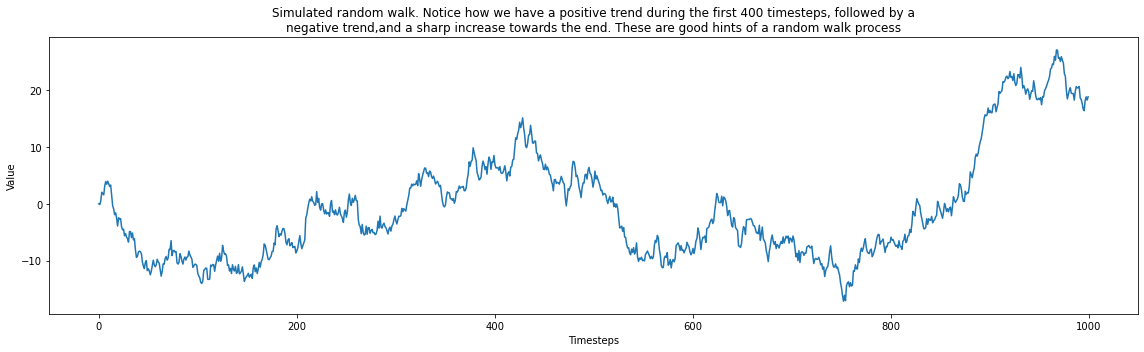

In [9]:
from textwrap import wrap
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (16,5)) 
ax.plot(random_walk) 
ax.set_xlabel('Timesteps') 
ax.set_ylabel('Value') 
ax.set_title("\n".join(wrap('Simulated random walk. Notice how we have a positive trend during the first 400 timesteps, followed by a negative trend,\
and a sharp increase towards the end. These are good hints of a random walk process', 110)))
plt.tight_layout() 
plt.show()

# ![Identify_Random_walk](C:/Users/JK/Downloads/Random_walk.PNG)

## 1.1. Identifying a random walk
To do this we first test for `stationarity`. In the case where data is non-stationary, we will apply a transformation, such as `differencing`, and test for stationarity again. If it is, we can plot the `autocorrelation function (ACF)`. If the plot does not show significant autocorrelation coefficients, then we can model time series as a `random walk`. Otherwise, we are in the presence of another kind of process.


### 1.1.1 Stationarity
A stationary process is one whose statistical properties do not change over time.
* A times series is said to be stationary if its `mean`, `variance` and `autocorrelation` do not change over time.
* We need to find ways to transform our time series to make them `stationary`.
* A `transformation` is simply a mathematical manipulation to the data in order to stabilize its `mean` and `variance`, thus making it `stationary`.
* The simplest transformation one can apply is differencing. This transformation helps stabilize the mean, which in turn removes or reduces the `trend` and `seasonality` effects.
* `Differencing` is calculating the series of change from one timestep to another.

### 1.1.2 Testing for stationarity
A common test to apply is the `Augmented Dickey-Fuller (ADF)` test.
1. It varifies:
    * Initialize H0: unit root = 1 (i.e. data is NOT stationary)
    * H1: unit root < 1 (i.e. data is stationary)
    * Dickey Fuller test statistics
2. If:
    * p < 0.5, H0 rejected, H1 accepted (i.e. data is stationary)
    
    else:
    * H0 accepted, H1 rejected (i.e. data is NOT stationary)

### 1.1.3 Autocorrelation function
The autocorrelation function measures the linear relationship between `lagged values` of a time series. In other words, it measures the correlation of the time series with itself.

### 1.1.4 Putting it all together


In [14]:
from statsmodels.tsa.stattools import adfuller 

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0])) # Retrieve the ADF statistic
    print('p - value: {}'.format(result[1])) # Retrieve the p-value
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    return result

In [15]:
ADF_result = adf_test(random_walk)

ADF Statistics: -0.9659524876918755
p - value: 0.7654789696692579
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


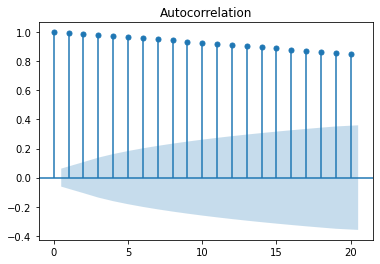

In [16]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(random_walk, lags=20)

## Notice how the autocorrelation coefficients slowly decrease. Even at lag 20, the value is still autocorrelated,
## which means that our random walk is not stationary at the moment. 

In [17]:
diff_random_walk = np.diff(random_walk, n=1) ## First difference
ADF_result1      = adf_test(diff_random_walk)

ADF Statistics: -31.789310857560594
p - value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


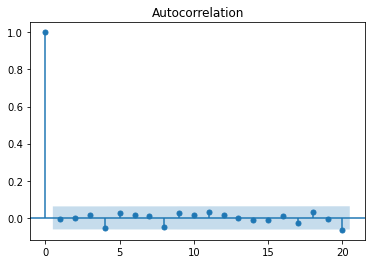

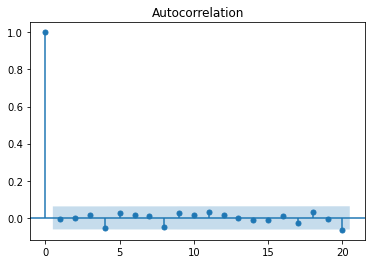

In [19]:
plot_acf(diff_random_walk, lags = 20)
## Notice how there are not significant coefficients after lag 0. This is a clear indicator that we are dealing with a random walk.
## This means that the stationary process is completely random and can therefore be described as white noise.
## Each value is simply a random step away from the previous one with no relation between them. 

### Google data

In [20]:
import pandas_datareader as pdr

df = pdr.get_data_yahoo('GOOGL')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-20,50.432499,50.113499,50.352501,50.253502,32120000.0,50.253502
2017-10-23,50.289501,49.154999,50.258999,49.277000,32786000.0,49.277000
2017-10-24,49.463001,48.854000,49.325001,49.424500,28902000.0,49.424500
2017-10-25,49.721500,48.886002,49.313499,49.573002,30574000.0,49.573002
2017-10-26,50.325500,49.523499,49.923500,49.570999,47396000.0,49.570999
...,...,...,...,...,...,...
2022-10-12,98.750000,96.739998,97.300003,97.559998,21876400.0,97.559998
2022-10-13,99.779999,94.379997,95.150002,99.059998,34574500.0,99.059998
2022-10-14,100.690002,96.370003,99.989998,96.559998,25388100.0,96.559998


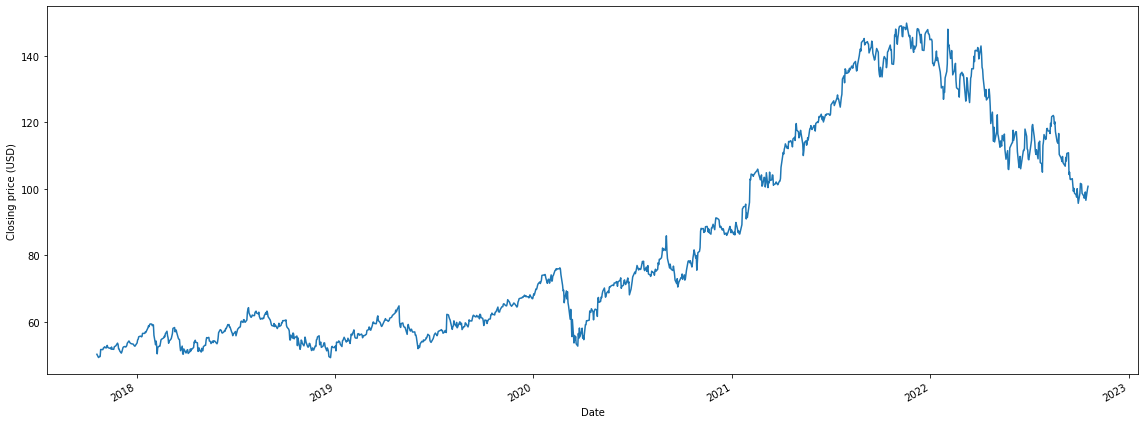

In [23]:
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(df.Close) 
ax.set_xlabel('Date') 
ax.set_ylabel('Closing price (USD)') 
fig.autofmt_xdate() 
plt.tight_layout() 
plt.show()

In [24]:
ADF_result = adf_test(df.Close)

ADF Statistics: -1.0142921447737778
p - value: 0.7480159431827235
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [25]:
diff_close = np.diff(df['Close'], n=1)
ADF_result = adf_test(diff_close)

ADF Statistics: -7.413836753858458
p - value: 7.019596509715597e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


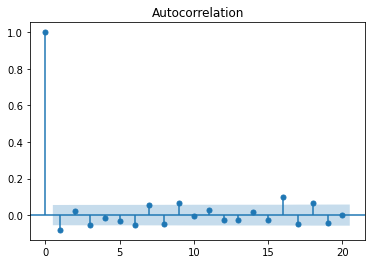

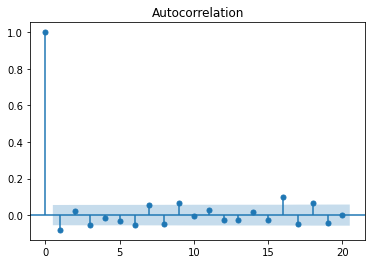

In [26]:
plot_acf(diff_close, lags=20)
## You might notice that at lag 5 and 18, the coefficients are significant, while the others are not.
## This happens by chance with some data and these points can be assumed to be non-significant,
## because we do not have consecutive significant coefficients between lag 0 and 5, or lag 0 and 18. 

### 1.3 Forecasting a random walk
#### 1.3.1 Forecasting on a long horizon


In [27]:
import pandas as pd

df    = pd.DataFrame({'value': random_walk})
train = df[:800]
test  = df[800:]

mean    = np.mean(train.value)
pred_df = test.copy()
pred_df['pred_mean'] = mean
pred_df.head()

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [28]:
last_value                 = train.iloc[-1].value
pred_df['pred_last_value'] = last_value
pred_df.head() 

,value,pred_mean,pred_last_value
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [29]:
deltaX = 800 - 0.0
deltaY = last_value - 0.0
drift  = deltaY / deltaX 
print(drift) 

-0.008518684374069831


In [33]:
x_vals.shape

(201,)

In [34]:
x_vals                = np.arange(800, 1000, 1)
pred_drift            = drift * x_vals
pred_df['pred_drift'] = pred_drift
pred_df.head()

,value,pred_mean,pred_last_value,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.814947
801,-6.392708,-3.677206,-6.814947,-6.823466
802,-6.296588,-3.677206,-6.814947,-6.831985
803,-6.758863,-3.677206,-6.814947,-6.840504
804,-7.193359,-3.677206,-6.814947,-6.849022


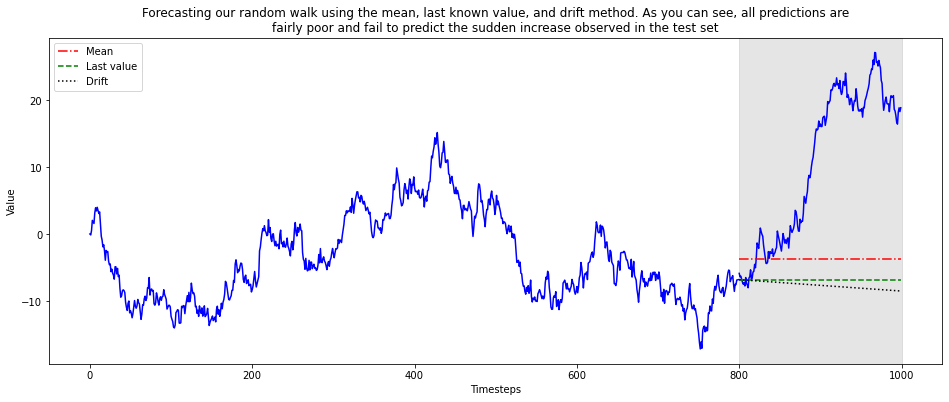

In [45]:

fig, ax = plt.subplots(figsize = (16,6)) 
ax.plot(train.value, 'b-')
ax.plot(pred_df.value, 'b-')
ax.plot(pred_df.pred_mean, 'r-.', label='Mean')
ax.plot(pred_df.pred_last_value, 'g--', label='Last value')
ax.plot(pred_df.pred_drift, 'k:', label='Drift')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('Timesteps') 
ax.set_ylabel('Value')
ax.set_title('\n'.join(wrap('Forecasting our random walk using the mean, last known value, and drift method. As you can see, \
all predictions are fairly poor and fail to predict the sudden increase observed in the test set', 120)))
plt.show()

#### 1.3.2 Forecasting the next timestep

In [38]:
df_shift = df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


In [39]:
df_shift.drop(0, axis=0, inplace=True)
df_shift.head()

,value
1,0.000000
2,-0.138264
3,0.509424
4,2.032454
5,1.798301


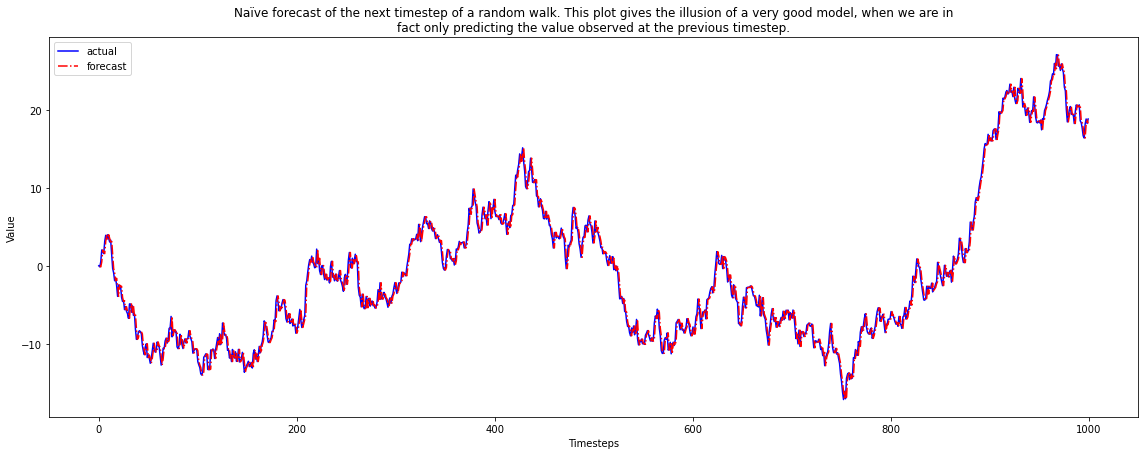

In [46]:
fig, ax = plt.subplots(figsize = (16,6)) 
ax.plot(df, 'b-', label='actual') 
ax.plot(df_shift, 'r-.', label='forecast')
ax.set_xlabel('Timesteps') 
ax.set_ylabel('Value') 
plt.tight_layout() 
plt.legend()
ax.set_title('\n'.join(wrap('Naïve forecast of the next timestep of a random walk. This plot gives the illusion of a very good \
model, when we are in fact only predicting the value observed at the previous timestep.', 120)))
plt.show()